In [1]:
from tensorflow.keras.models import load_model

# Load the entire model
model = load_model('segmentation.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Flooded: [[ True]] [[1.]]


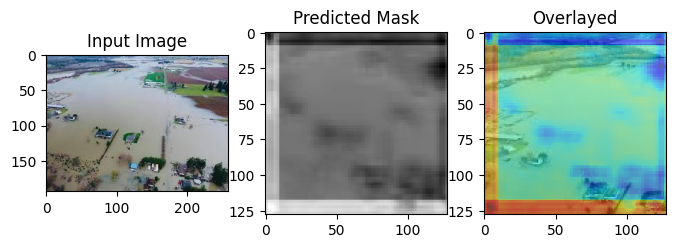

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

image_path = 'D:\FloodAihackthon\segmentation\images.jpeg'
def predict_image(image_path, model):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    image = tf.keras.preprocessing.image.img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    
    class_pred, mask_pred = model.predict(image)
    return class_pred, mask_pred

# Example usage
class_pred, mask_pred = predict_image(image_path, model)
print(f'Flooded: {class_pred > 0.5} {class_pred}')

# Plot the results
plt.figure(figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(tf.keras.preprocessing.image.load_img(image_path))

plt.subplot(1, 3, 2)
plt.title('Predicted Mask')
plt.imshow(mask_pred[0, :, :, 0], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Overlayed')
plt.imshow(tf.keras.preprocessing.image.load_img(image_path))
plt.imshow(mask_pred[0, :, :, 0], cmap='jet', alpha=0.5)

plt.show()